<a href="https://colab.research.google.com/github/zmike808/COMP5200M-MSc-Project/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd "/gdrive/MyDrive/micro expression datasets"
%pwd

Mounted at /gdrive
/gdrive/MyDrive


'/gdrive/MyDrive'

## main code

In [ ]:
#@title installs
!pip install deepface
!pip install seaborn
!pip install git+https://github.com/oarriaga/paz.git

In [ ]:
#@title imports
import pandas as pd
import pathlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from paz.backend.image import load_image
from paz.pipelines import MiniXceptionFER
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
#@title global funcs/classes
paz_classifier = MiniXceptionFER()
class FaceImage:
  # deepface_models = {}
  # deepface_models["emotion"] = DeepFace.build_model("Emotion")
  
  def __init__(self, path, actual):
    self.path = path #pathlib.Path(path)
    self.actual = actual
    self.paz_image = load_image(self.path)
    self.paz_emotion = None
    self.predict_paz()
    
    # self.models = models
    # self.deep_face()
  def predict_paz(self):
    global paz_classifier
    self.paz_prediction = paz_classifier(self.paz_image)
    self.paz_emotion = self.paz_prediction['class_name']
    paz_predict = self.convert_emotion(self.paz_emotion)
    self.paz_predict = paz_predict
    return paz_predict
  def deep_face(self,analysis):
    # if deepface_models:
    # analysis = DeepFace.analyze(self.path,actions=['emotion'])
    # else:
    #   analysis = DeepFace.analyze(self.path,actions=['emotion'])
    self.deepface_dominant_emotion = analysis['dominant_emotion']
    self.deepface_predict = self.convert_emotion(self.deepface_dominant_emotion)
  
  @staticmethod
  def convert_emotion(emotion: str):
    emotion = emotion.lower()
    if emotion == "happy":
      # 1 => positive
      return 1
    if emotion == "suprise":
      # 2 => suprise
      return 2
    # 0 => negative
    return 0

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


876544/868256 [==============================] - 0s 0us/step


In [ ]:
def build_faces(df):
  db = dict(zip(df.index,df.label))
  print(db)

  img_paths = list(db.keys())
  print(img_paths)

  models = {}
  models["emotion"] = DeepFace.build_model("Emotion")
  actions = ['emotion']

  preds = DeepFace.analyze(img_path = img_paths, actions = ['emotion'],models=models)
  # print(preds)
  # print(type(preds))

  # pazimg = []
  # for k,v in db.items():
  #   pazimg.append(FaceImage(k,v))

  faceimages = []
  clean_preds = dict()
  for k,p in zip(preds,img_paths):
    clean_preds[p] = preds[k]
  # print(clean_preds)
  for k,v in db.items():
    if not pathlib.Path(k).exists():
      print(k)
      raise FileNotFoundError()
    face = FaceImage(k,v)#,models=models)
    # face.deep_face(models=models)
    face.deep_face(clean_preds[k])
    # print(k,v,vars(face))
    faceimages.append(face)
  return faceimages

In [ ]:
def load_csv(csv_file):
  smic_df = pd.read_csv(csv_file,index_col='apex_frame_path')
  # print(smic_df)
  df = smic_df.copy()
  for index, series in smic_df.iterrows():
    # print(index,series)
    if not pathlib.Path(index).exists():
      df = df.drop(index)
  print(df)
  faceimages = build_faces(df)
  return faceimages

In [ ]:
# print([x.paz_emotion for x in faceimages])
# print([x.paz_predict for x in faceimages])
from pathlib import Path
dataset_names = ['smic','samm','casme2','combination']
datasets = dict()
for name in dataset_names:
  csv_path = Path(f"/gdrive/MyDrive/micro expression datasets/{name}_five_frames.csv")
  if csv_path.exists():
    datasets[name] = load_csv(csv_path)
    print(datasets)
    print(csv_path)
  else:
    print(f'error {name} set csv file was not found tried loooking at {csv_path}')
# smic_set = load_csv(smic_csv)
# samm_set = load_csv(samm_csv)
# casme_set = load_csv(casme_csv)

In [ ]:
class Dataset:
  def __init__(self,name,paz_matrix,deepface_matrix):
    self.name = name
    self.paz_matrix = paz_matrix
    self.deepface_matrix = deepface_matrix

matrixes = []
for name,data in datasets.items():
  paz_confusion_matrix = confusion_matrix([x.actual for x in data], [x.paz_predict for x in data])
  deepface_confusion_matrix = confusion_matrix([x.actual for x in data], [x.deepface_predict for x in data])
  dset = Dataset(name,paz_confusion_matrix,deepface_confusion_matrix)
  matrixes.append(dset)
print(matrixes[0].paz_matrix)
# make_confusion_matrix(cf_matrix,cmap=None)

[[253   5   0]
 [165   9   0]
 [158   4   0]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

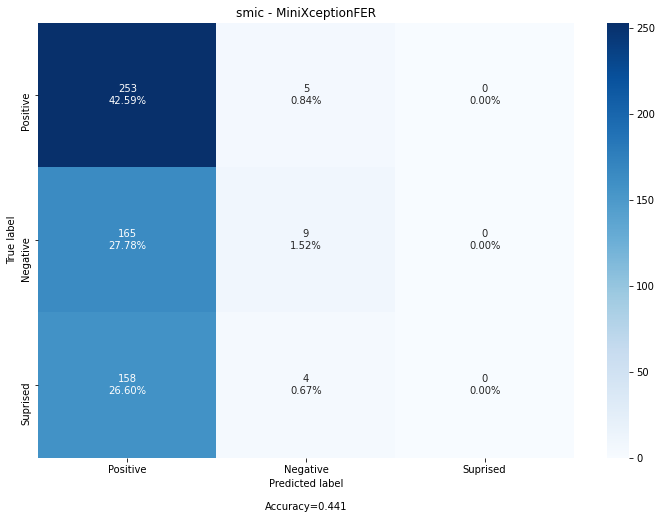

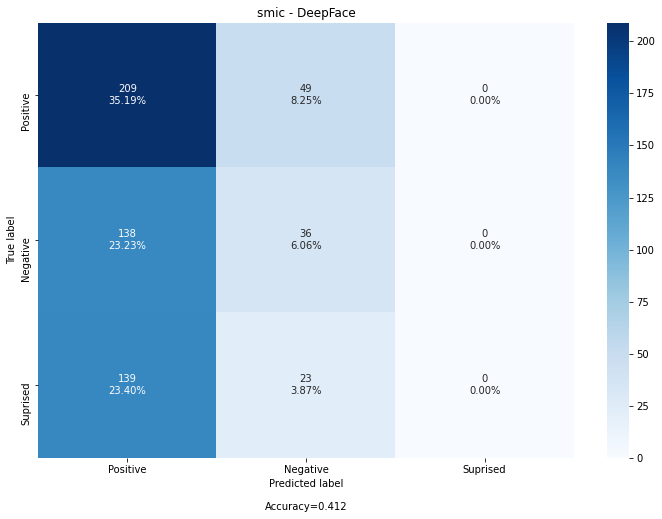

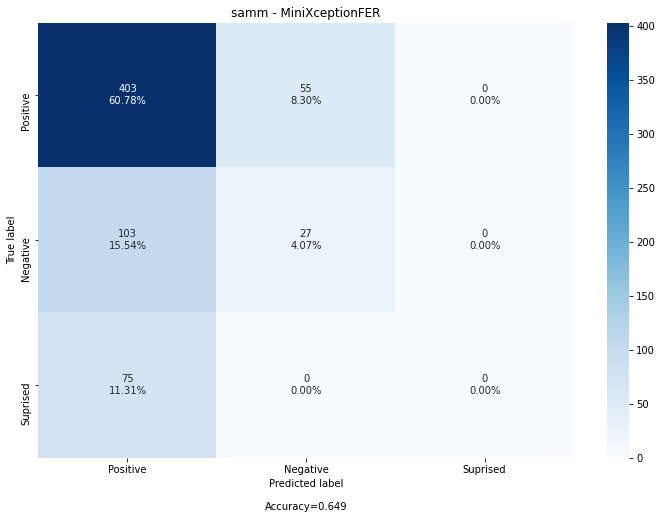

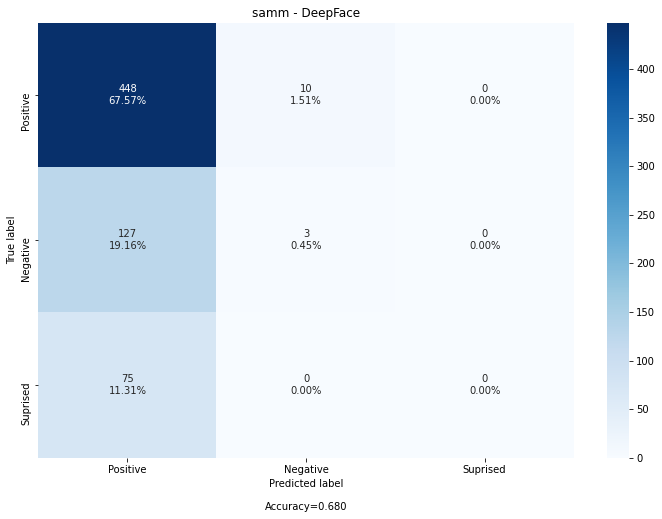

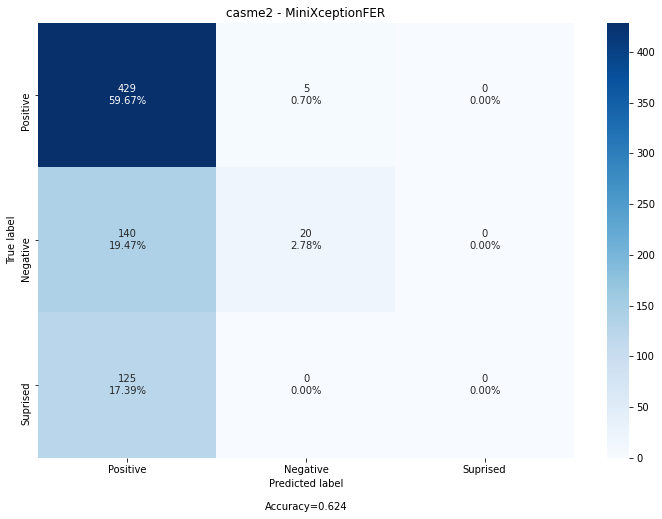

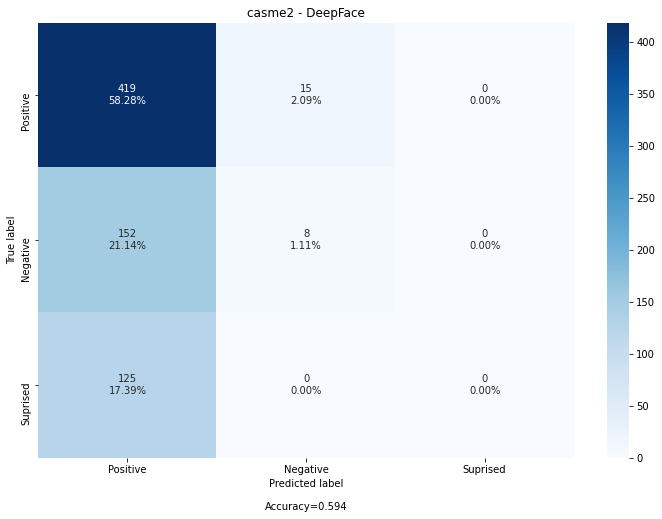

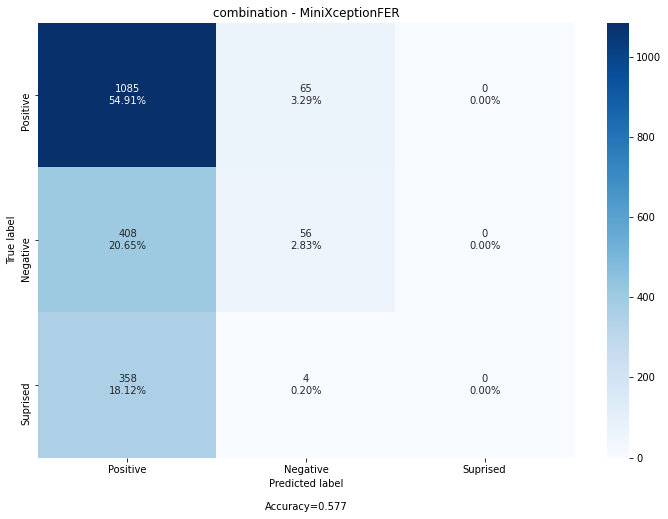

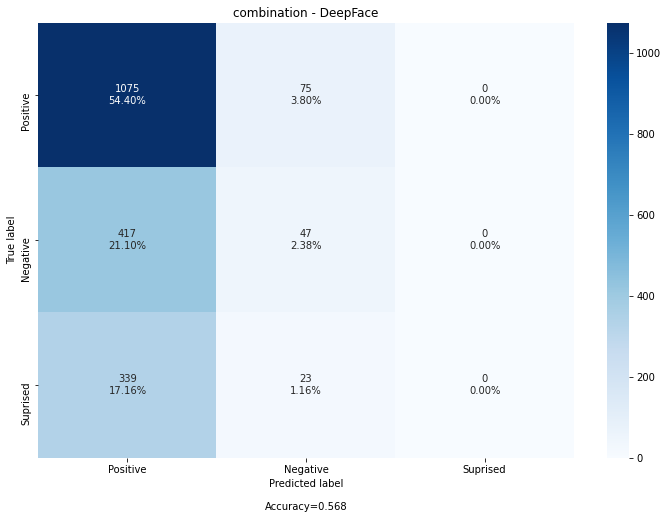

In [ ]:
# print([x.actual for x in faceimages])
# print([x.deepface_predict for x in faceimages])
# %matplotlib widget
from matplotlib import pyplot as plt
# deepface_confusion_matrix = confusion_matrix([x.actual for x in faceimages], [x.deepface_predict for x in faceimages])
# cf_matrix = deepface_confusion_matrix
# print(cf_matrix)
category_names = ['Positive', 'Negative', 'Suprised']
x,y=12,8
dpi=200.0
for data in matrixes:
  make_confusion_matrix(data.paz_matrix,categories=category_names,figsize=(x,y),title=f"{data.name} - MiniXceptionFER")
  plt.savefig(f"{data.name} - MiniXceptionFER.png", bbox_inches='tight',dpi=dpi)
  make_confusion_matrix(data.deepface_matrix,categories=category_names,figsize=(x,y),title=f"{data.name} - DeepFace")
  plt.savefig(f"{data.name} - DeepFace.png", bbox_inches='tight',dpi=dpi)
